# **Wine Quality Data Analysis**

## By Fisayo Banjoko

## Dataset Background

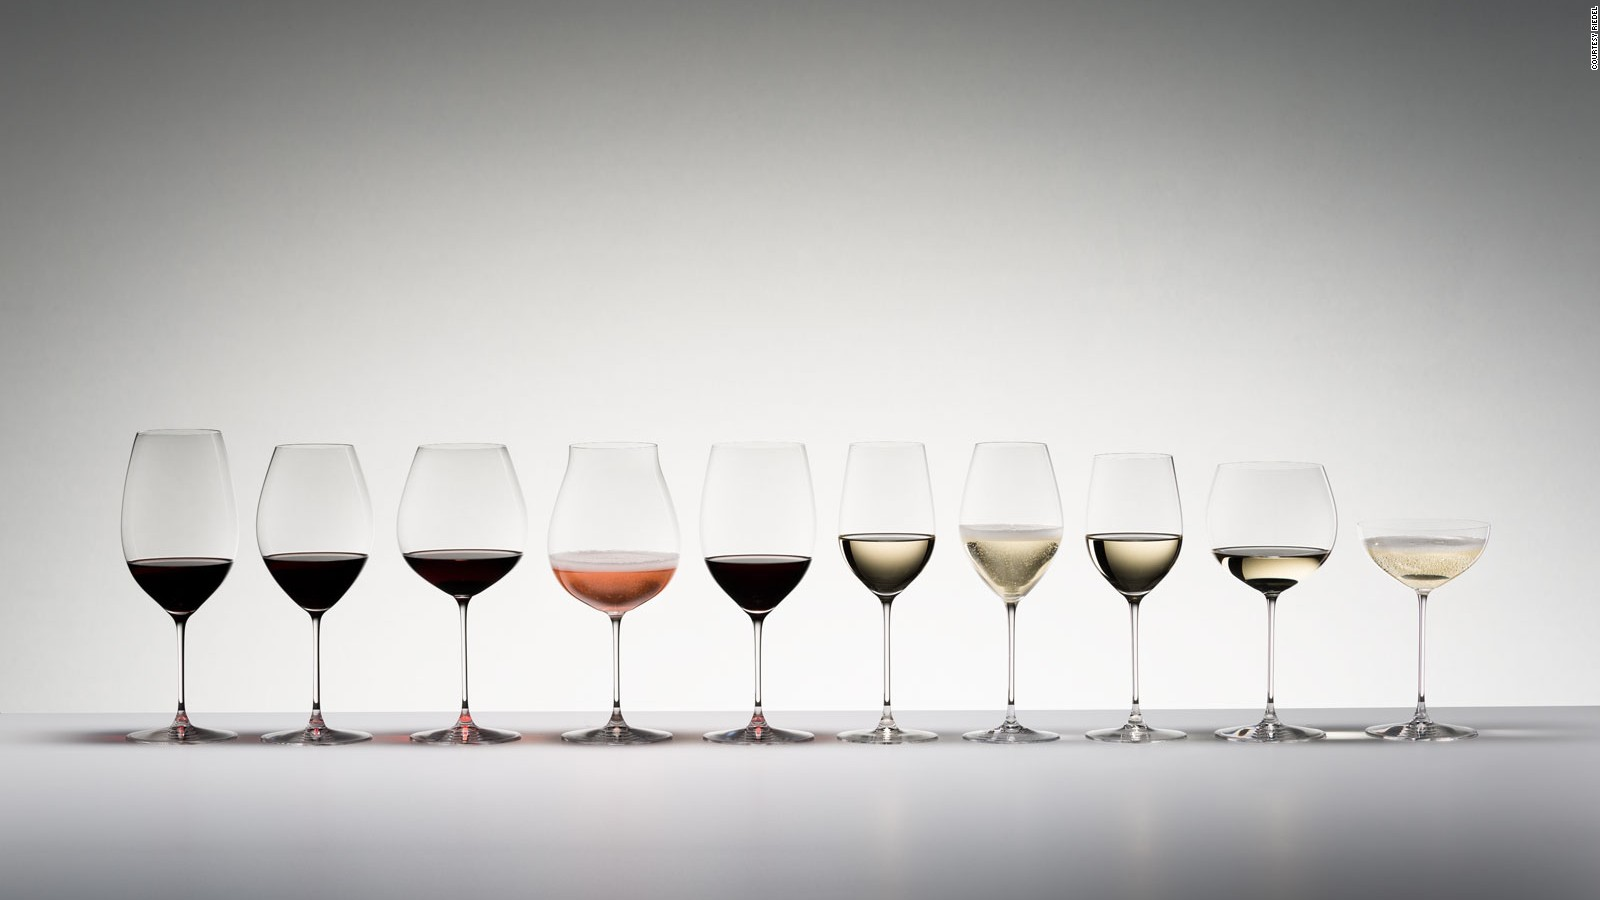
  
This notebook performs data analysis on a dataset related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. Hence, the quality is the target or dependent variable. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). After the dataset was cleaned, exploratory data analysis was performed highligting relevant patterns in the dataset. The data was also preprocessed and machine learning classification models were built to predict the quality of wine.

## Data Cleaning

To get the best representation of the data and improve the quality of the data, data cleaning techniques were applied to the dataset.

### Import Dataset

In [42]:
#import libraries
import numpy as np
import pandas as pd

In [43]:
#import dataset from github repository and read data as dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Fifi-Banjoko/Data-Analysis/main/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Remove Unnecessary Columns

The Id column is removed because it doesn't add any relevant information to dataset

In [44]:
#remove the Id column
df = df.drop(['Id'], axis = 1)

### Data Information

This prints a concise summary of the dataframe, showing the index, column, non-null values, data type of each column and memory usage. This dataset has only float and integer values, no non-null values and a memory usage of ~**107.3 KB**.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


### Check for Null Values

Null values are a lack of value which maybe unknown or missing. This absence of data reduces statistical power and causes bias of a model and should be removed. This dataset has no null values.

In [46]:
df.isnull().values.all()

False

### Statistiscal Summary of Data

This shows descriptive statistical information about each variable in the dataset. This can give a glimpse of the distribution and dispersion of the dataset. For exmaple, this summary shows a large difference between the upper interquatrile range (75%) and the maximum value for *free sulfur dioxide* and *total sulfur dioxide* which indicates the presence of outliers. 

In [47]:
df.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Check for Duplicates

Duplicates are an extreme case of non-random sampling, and they bias the fitted model. It is important that they are removed. This dataset has **125** duplicate rows that are removed.

In [48]:
#check number of duplicate rows if any
sum(df.duplicated())

125

In [49]:
#remove the duplicate rows so our fitted model is not biased
#keeping the first instance of the row as unique and the other instances as duplicates and removing the duplicates
df_dup = df.duplicated(keep='first')
df = df[~df_dup]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


### Unique Values of the Data

This shows the unique values of each column and the total number of unique values. This also shows that there are 6 unique values for the quality variable, which means wine quality is represented using 6 distinct values.  

In [50]:
#check for unique values
#this shows that the quality of wine has six categories
df.nunique().sort_values(ascending=True)

quality                   6
free sulfur dioxide      53
alcohol                  61
citric acid              77
residual sugar           80
pH                       87
sulphates                89
fixed acidity            91
chlorides               131
volatile acidity        135
total sulfur dioxide    138
density                 388
dtype: int64

### Check for Outliers

An outlier is a data point that lies either below the lower interquartile range (25%) or above the upper interquartile range (75%). Outliers may indicate wrong data entry, bada data points or may contain further information about the dataset. This dataset contains **385** outliers. For this dataset, the outliers are left as is and are not removed, replaced or capped. This is because the columns containing the most outliers will be removed from the dataset on further analysis and the distribution of the outliers suggest that they might be of importance to the analysis.

In [51]:
#create a function to find outliers
def find_outliers(df):
    q1= df.quantile(0.25)
    q3= df.quantile(0.75)
    IqR = q3 - q1                             # IqR- Interquantile Range
    outliers = df[((df<(q1-1.5*IqR)) | (df>(q3+1.5*IqR)))]    
    return outliers

outliers= find_outliers(df)

In [52]:
#check the number of outliers in each coloumn and the total number of outliers
total_number_of_outliers = 0
for col in df.columns:
    total_number_of_outliers += len(find_outliers(df[col]))
    print('number of ' + col + ' outliers: ' + str(len(find_outliers(df[col]))))
    
print('total number of outliers: ' + str(total_number_of_outliers))

number of fixed acidity outliers: 37
number of volatile acidity outliers: 10
number of citric acid outliers: 1
number of residual sugar outliers: 95
number of chlorides outliers: 71
number of free sulfur dioxide outliers: 16
number of total sulfur dioxide outliers: 33
number of density outliers: 30
number of pH outliers: 24
number of sulphates outliers: 41
number of alcohol outliers: 6
number of quality outliers: 21
total number of outliers: 385


-----

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of performing initial investigations on data to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. Histogram, Correlation Heatmap, Regression Plot and Box Plot are EDA techniques that were used to get an overview of the dataset. 

### Import Libraries for EDA

In [53]:
#import necessary libraries for exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

### Histogram

A simple but powerful way of showing the frequency distribution of discrete or continous data. The Histogram shows that the dataset is a right-skewed (positively skewed) distribution which indicates the presence of outliers. Individial histograms of individual variables further show the variables that cause this skewness and have a high number of outliers. This is consistent with the previous analysis of the number of outliers for each column. For example, *residual sugar* and *chlorides* are very skewed right with their number of outliers being the highest, 95 and 71 respectively.

[Text(0.5, 1.0, 'Data Distribution of Variables')]

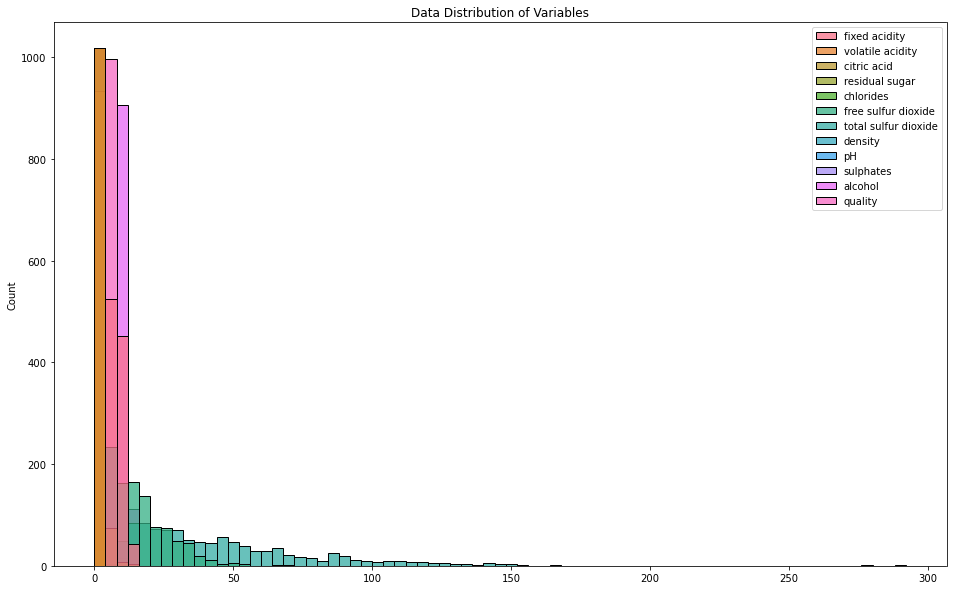

In [54]:
#plot a histogram
fig, ax = plt.subplots(figsize=(16,10)) #setting the figure size
sns.histplot(df, binwidth = 4).set(title= 'Data Distribution of Variables')

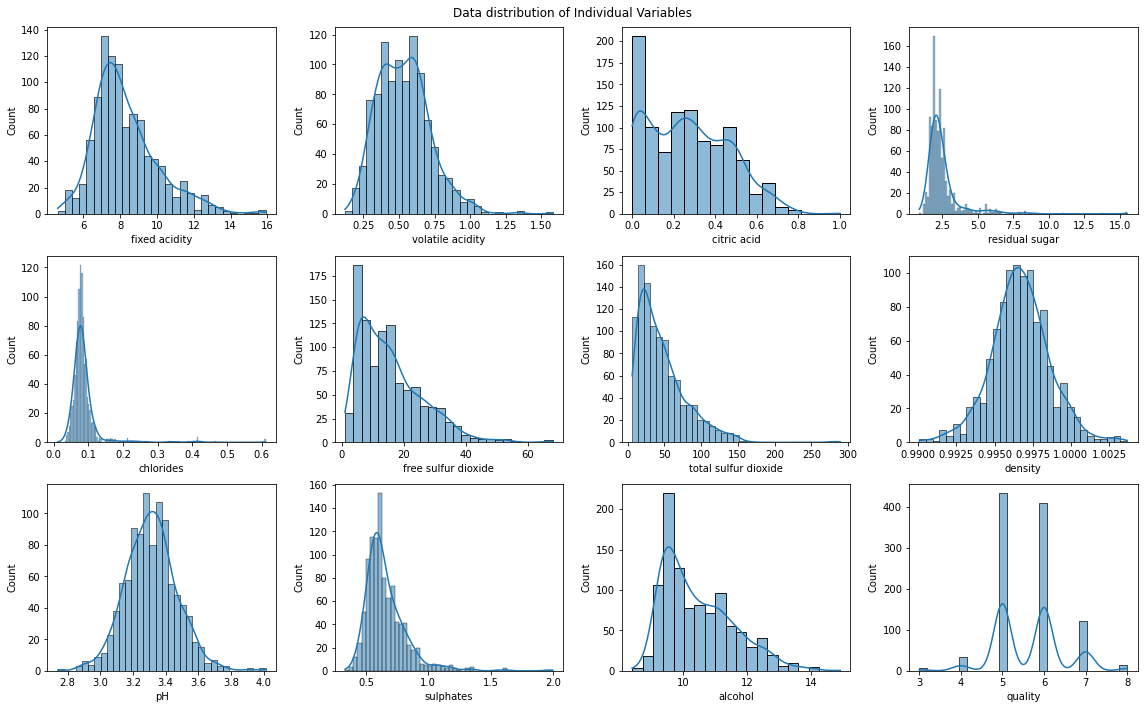

In [55]:
#plot individual histograms
fig2, ax2 = plt.subplots(figsize=(16,10)) #setting the figure size

#looping over the columns in the dataset to plot a histogram
for i, col in enumerate(df.columns):
    ax2 = plt.subplot(3,4, i+1) #setting the axes to three rows and four columns
    sns.histplot(data=df, x=col, ax=ax2, kde=True)
plt.suptitle('Data distribution of Individual Variables')
plt.tight_layout()

## Correlation Heatmap

Correlation is a measure of linear relationship between two variables. A Correlation Heatmap plots the amount of correlation, that is, measure of dependence between variables represented by colors. The varying intensity of color represents the measure of correlation. For example, the correlation heatmap shows that *fixed acidity* is strongly positively correlated with *density* and strongly negatively correlated with *pH*. The correlation heatmap can also show the most relevant variables that influence the *target variable*. For example, *alcohol*, *volatile acidity* and *sulphates* are more strongly correlated and have the most impact on wine quality. While, *residual sugar*, *pH* and *free sulphur dioxide* are the least correlated and might be removed on further analysis.

In [56]:
#find the correlation of the dataframe using the corr() function to find the pairwise correlation of all columns in the data frame
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.236894,0.668178,0.173726,0.102446,-0.152582,-0.100716,0.683120,-0.692597,0.181277,-0.077624,0.115826
volatile acidity,-0.236894,1.000000,-0.542459,-0.008701,0.051371,-0.007556,0.071870,0.028614,0.226348,-0.280601,-0.207419,-0.409340
citric acid,0.668178,-0.542459,1.000000,0.178362,0.246843,-0.048523,0.047903,0.368832,-0.553370,0.347933,0.102134,0.241565
residual sugar,0.173726,-0.008701,0.178362,1.000000,0.058410,0.146929,0.188528,0.363112,-0.120993,0.006738,0.070779,0.022718
chlorides,0.102446,0.051371,0.246843,0.058410,1.000000,0.014612,0.044947,0.210932,-0.277536,0.392989,-0.234283,-0.122214
free sulfur dioxide,-0.152582,-0.007556,-0.048523,0.146929,0.014612,1.000000,0.661089,-0.049664,0.051018,0.031844,-0.060876,-0.071083
total sulfur dioxide,-0.100716,0.071870,0.047903,0.188528,0.044947,0.661089,1.000000,0.053496,-0.071037,0.004963,-0.197917,-0.182214
density,0.683120,0.028614,0.368832,0.363112,0.210932,-0.049664,0.053496,1.000000,-0.366173,0.138789,-0.504748,-0.185187
pH,-0.692597,0.226348,-0.553370,-0.120993,-0.277536,0.051018,-0.071037,-0.366173,1.000000,-0.192979,0.230655,-0.057592
sulphates,0.181277,-0.280601,0.347933,0.006738,0.392989,0.031844,0.004963,0.138789,-0.192979,1.000000,0.096239,0.257519


[Text(0.5, 1.0, 'Correlation Heatmap')]

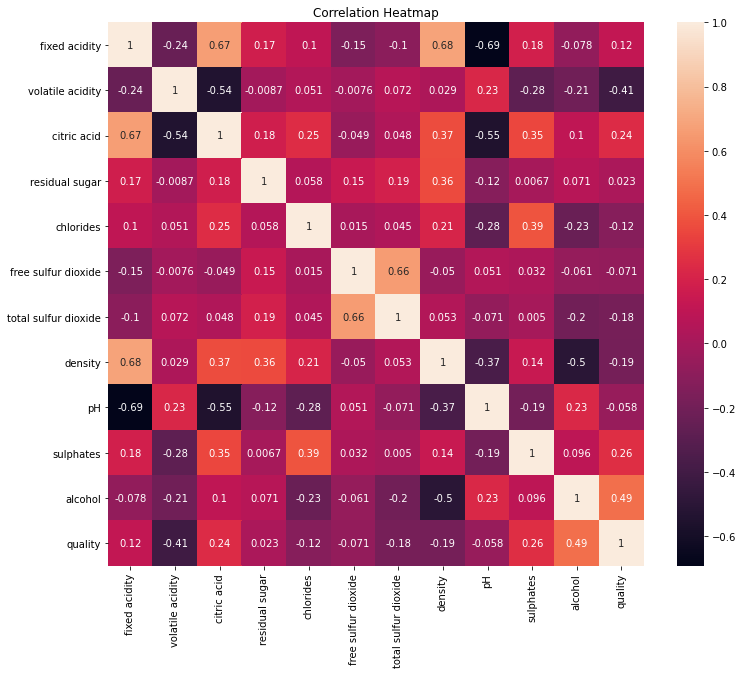

In [57]:
#use df.corr array to plot the correlation heatmap
fig3, ax3 = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True).set(title= 'Correlation Heatmap')

## Regression plot

A Regression Plot draws a scatterplot of two variables, fits a regression model and plot the resulting regression line and a 95% confidence interval for that regression. This helps to emphasize patterns between the variables. The Correlation Heatmap highlights variables to be used for the regression plot. For example, the regression plot shows a positive linear relationsip between *fixed acidity* and *density* and a negative linear relationship between *fixed acidity* and *pH* and so on which is consistent with the results of the correlation heatmap. Since correlation between independent variables is not desired this might also highlight variables that might be removed.

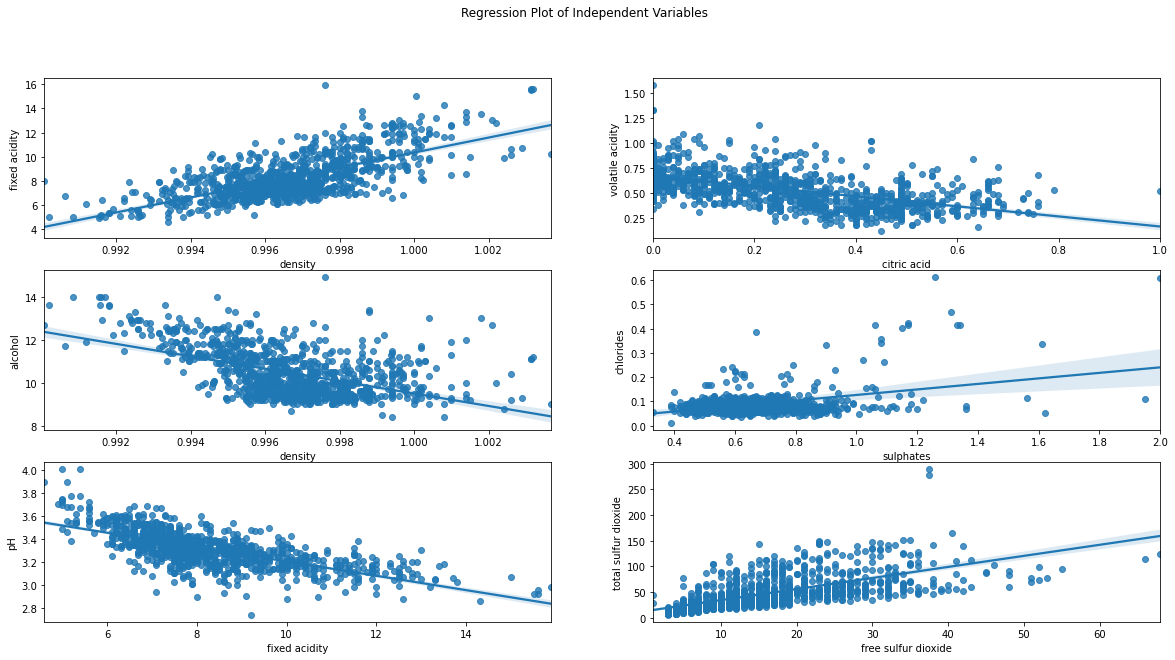

In [58]:
#setting the figure axes with three rows and 2 columns
fig4, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,10))

#regression plot using seaborn
sns.regplot(x= 'density', y='fixed acidity', data= df, ax= ax1)
sns.regplot(x= 'citric acid', y='volatile acidity', data= df, ax= ax2)
sns.regplot(x= 'density', y='alcohol', data= df, ax= ax3)
sns.regplot(x= 'sulphates', y='chlorides', data= df, ax= ax4)
sns.regplot(x= 'fixed acidity', y='pH', data= df, ax= ax5)
sns.regplot(x= 'free sulfur dioxide', y='total sulfur dioxide', data= df, ax= ax6)

plt.suptitle('Regression Plot of Independent Variables')
plt.show()

Plotting a regression plot with quantity against all variables also show the linear relationship between *quality* and all independent variables. From the regression plot we can also confirm postive and negative correlations from the correlation heatmap. For example, *alcohol* has a positive linear relationship with quality, and *volatile acidity* has a negative linear relationship with quality.

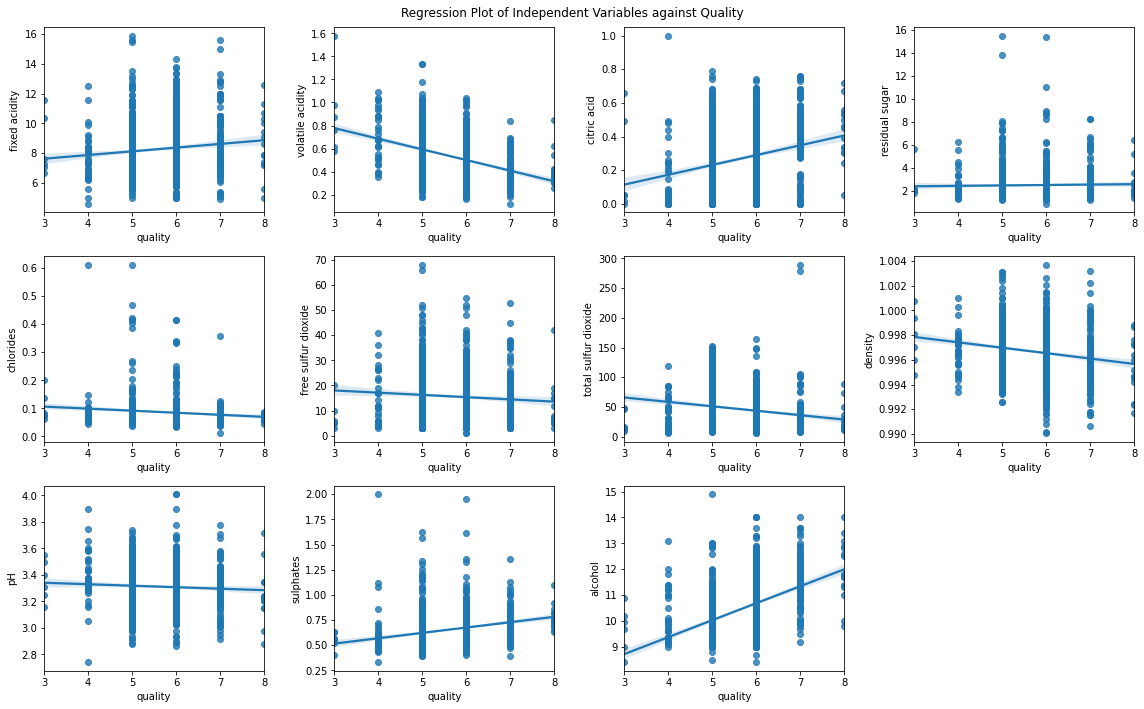

In [59]:
fig5, ax5 = plt.subplots(figsize=(16,10)) #setting the figure size

for i, col in enumerate(df.iloc[:,0:-1]):
    ax2 = plt.subplot(3,4, i+1)
    sns.regplot(data=df, y=col, x= 'quality', ax=ax2)
plt.suptitle('Regression Plot of Independent Variables against Quality')
plt.tight_layout()

### Box plot

A Box Plot visually displays the summary (minimum value, interquartiles, median, maximum value, outliers) of the data. This shows the distribution of quantitative data in a way that facilitates comparisons between variables. The first set of boxplots show the distribution of the variables and outliers, while the second boxplot compares each independent variable with the quality. This shows overall patterns of response of these variables with each category of quality.

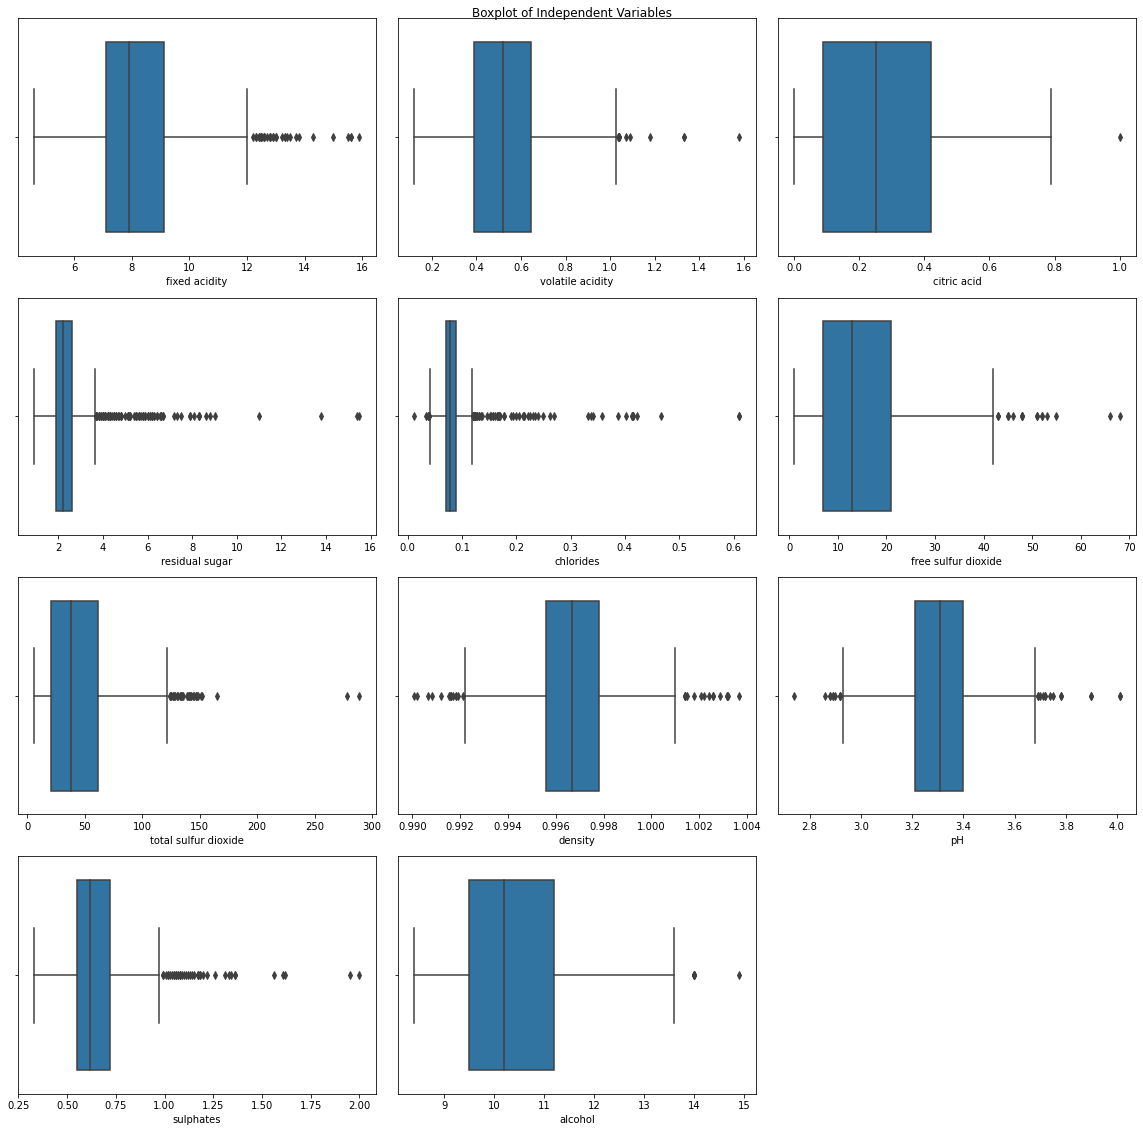

In [60]:
fig6, ax6 = plt.subplots(figsize=(16,16)) #setting the figure size

for i, col in enumerate(df.iloc[:,0:-1]):
    ax2 = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax2)
plt.suptitle('Boxplot of Independent Variables')
plt.tight_layout()

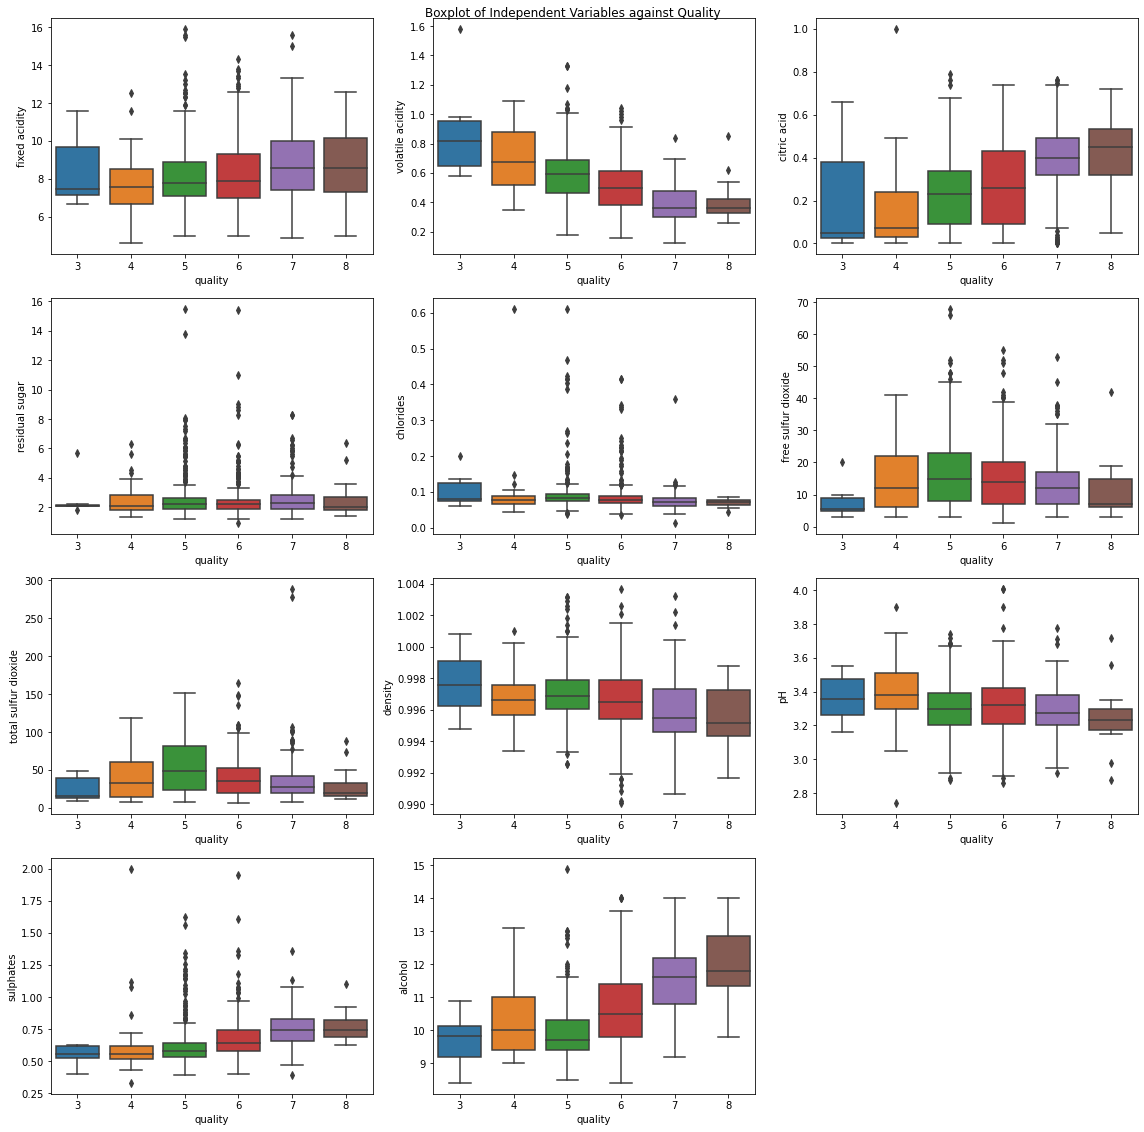

In [61]:
fig7, ax7 = plt.subplots(figsize=(16,16)) #setting the figure size

for i, col in enumerate(df.iloc[:,0:-1]):
    ax2 = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, y=col, x= 'quality', ax=ax2)
plt.suptitle('Boxplot of Independent Variables against Quality')
plt.tight_layout()

### Count Plot and Pie Chart showing Distinct Values of Quality

The Count Plot and Pie Chart shows quantitative distribution of *quality*. The count plot and pie chart show that the data is unbalanced with the highest quality count in the dataset being 5 and 6. Binning quality also shows that the quality of wine can be further catergorised into normal, excellent and poor. That is, majority of wine have a quality of either 5 or 6 and are normal wines and the minority of wine are excellent or poor.

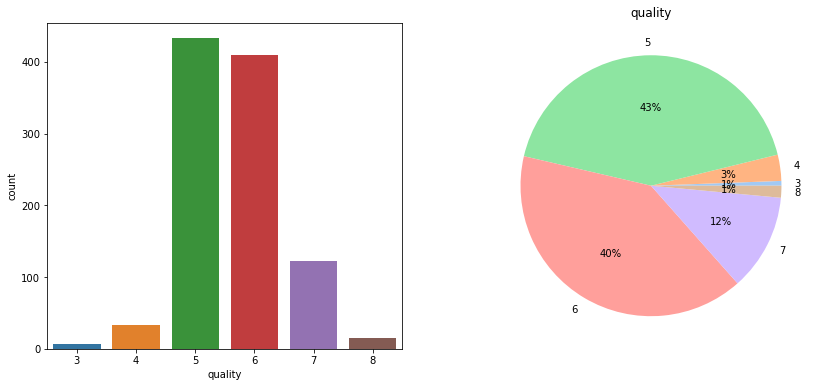

In [62]:
fig8, ((ax1), (ax2)) = plt.subplots(1, 2, figsize=(14,6))
colors = sns.color_palette('pastel')[0:6]

#plot a count plot to show the count of each quality category of wine
sns.countplot(x ='quality', data=df, ax= ax1)


#express the count of quality category as percentages in a pie chart
target_var=pd.crosstab(index=df['quality'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index, autopct='%.0f%%', colors=colors)
plt.title('quality')
plt.show()

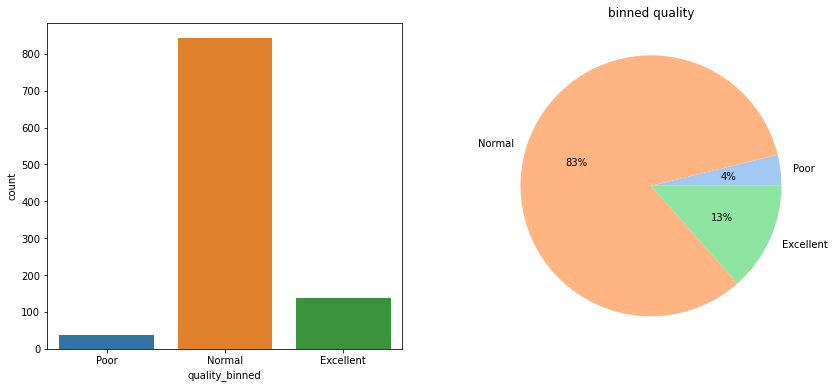

In [63]:
#creating a copy of dataframe so dataframe is not affected
df_copy= df.copy()

#setting the bin parameters
bins = np.linspace(min(df_copy["quality"]), max(df_copy["quality"]), 4)
bins
group_names = ['Poor', 'Normal', 'Excellent']
df_copy['quality_binned'] = pd.cut(df_copy['quality'], bins, labels=group_names, include_lowest=True )

df_copy[['quality_binned', 'quality']].head()

fig9, ((ax1), (ax2)) = plt.subplots(1, 2, figsize=(14,6))
colors = sns.color_palette('pastel')[0:6]

#plot a count plot to show the count of each quality category of wine
sns.countplot(x ='quality_binned', data=df_copy, ax= ax1)


#express the count of binned quality category as percentages in a pie chart
target_var=pd.crosstab(index=df_copy['quality_binned'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index, autopct='%.0f%%', colors=colors)
plt.title('binned quality')
plt.show()

## Results of EDA

The results of the Exploratory Data Analysis show that: 

* The dataset is right skewed with outliers. The variables Residual Sugar and Chlorides being the most skewed with the most outliers. 
* Alcohol, Volatile Acidity and Sulphates are the most strongly correlated variables to quality and the strongest indicators of wine quality.
* Alcohol has a positive linear relationship with quality, so a higher quality wine indicates a higher alcohol content.
* Volatile Acidity has a negative linear relationship with quality, so a higher quality wine indicates a lower volatile acidity.
* Sulphates have a positive linear relationship with quality, so a higher quality wine indicates a higher Sulphate content.
* There are more normal wine than excellent and poor wine, and more excellent wine than poor wine.

---

## Data Preprocessing

Data preprocessing helps to convert data to a format that can be used for further processing. The dataset is taken through some data preprocessing techniques like oversampling, feature selection, data splitting and feature scaling in preparation for the machine learning models.

### Oversampling

Since the data is imbalanced, it has to be oversampled to reduce bias and prevent the machine learning models from ignoring the minority class. Oversampling randomly duplicates examples in the minority class to match the quantity in the majority class. Applying SMOTE (Synthetic Minority Oversampling Technique) balances out the dataset.

In [64]:
#import smote library
from imblearn.over_sampling import SMOTE

#Applying SMOTE 
sm=SMOTE()
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

X,y=sm.fit_resample(X,y)

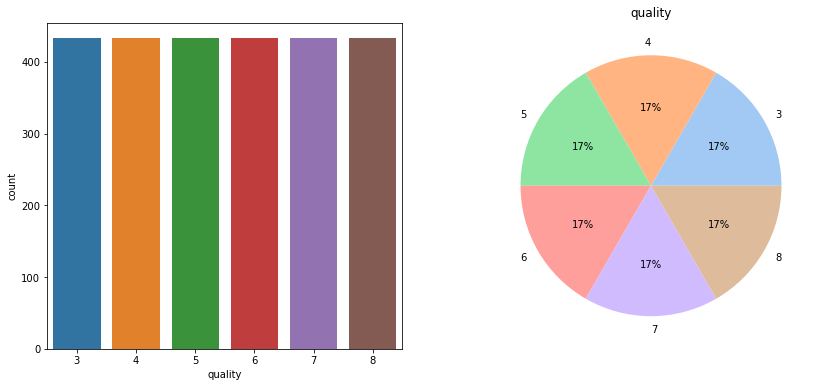

In [65]:
#count plot showing the countplot and pie chart after applying SMOTE
fig11, ((ax1), (ax2)) = plt.subplots(1, 2, figsize=(14,6))
colors = sns.color_palette('pastel')[0:6]

sns.countplot(x=y, ax=ax1)

target_var2=pd.crosstab(index=y, columns='% observations')
plt.pie(target_var2['% observations'],labels=target_var2['% observations'].index,autopct='%.0f%%', colors=colors)
plt.title('quality')
plt.show()

### Feature Selection

Feature selection helps to reduce the number of input variables to improve the performance of the model by choosing the input variables that have the strongest relationship with the target variable, *quality*. The ANOVA method is used to select the best features because the independent or predictor variables are numerical and the target variable is categorical. The graph shows the relationship between the independent variables and *quality* which is consistent with the exploratory data analysis. The variables with the weakest relationship with *quality* are removed.

fixed acidity : 1.55%
volatile acidity : 33.66%
citric acid : 8.91%
residual sugar : 0.24%
chlorides : 1.91%
free sulfur dioxide : 3.33%
total sulfur dioxide : 4.57%
density : 5.05%
pH : 3.72%
sulphates : 6.69%
alcohol : 30.37%


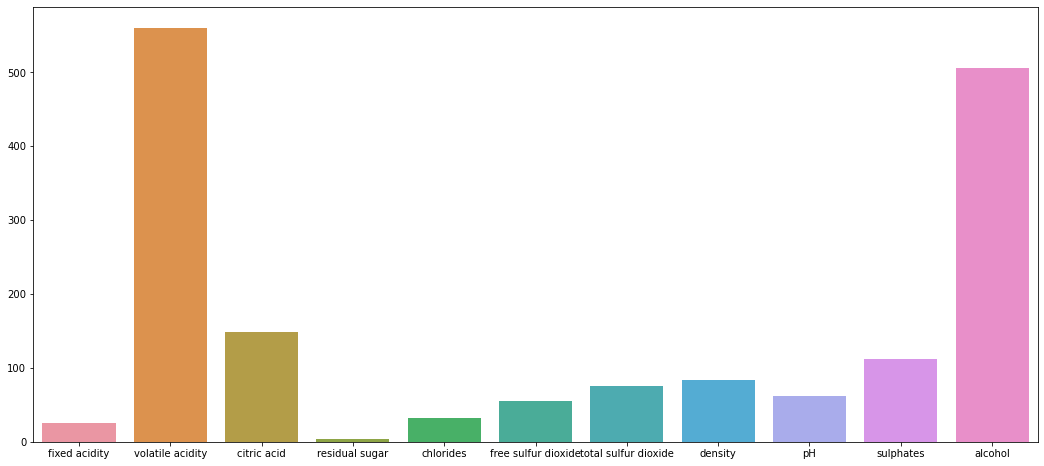

In [66]:
#import libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif #ANOVA

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, y)
SelectKBest(k='all')
feature_contribution=(fs.scores_/sum(fs.scores_))*100
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(18,8))
sns.barplot(x=X.columns,y=fs.scores_)
plt.show()

In [67]:
#dropping the weakest columns
df= df.drop(columns = ['residual sugar', 'fixed acidity', 'chlorides', 'free sulfur dioxide'])
df

,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,0.00,34.0,0.99780,3.51,0.56,9.4,5
1,0.880,0.00,67.0,0.99680,3.20,0.68,9.8,5
2,0.760,0.04,54.0,0.99700,3.26,0.65,9.8,5
3,0.280,0.56,60.0,0.99800,3.16,0.58,9.8,6
5,0.660,0.00,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1138,0.510,0.13,40.0,0.99574,3.42,0.75,11.0,6
1139,0.620,0.08,38.0,0.99651,3.42,0.82,9.5,6
1140,0.600,0.08,44.0,0.99490,3.45,0.58,10.5,5
1141,0.550,0.10,51.0,0.99512,3.52,0.76,11.2,6


### Data Split

Data is split into training and test set for machine learning modeling in the ratio 80:20.

In [68]:
#import library
from sklearn.model_selection import train_test_split

#splitting thre training and test set into 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(2078, 11)
(2078,)
(520, 11)
(520,)


(None, None)

### Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. Feature Scaling helps to transform the data in a way that makes it easier for algorithms to glean a meaningful relationship between variables.

In [69]:
#import library
from sklearn.preprocessing import StandardScaler

#fit data to scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

---

## Machine Learning Modeling

A machine learning model is a file that has been trained to recognize certain types of patterns. A model is trained over a set of data, providing it an algorithm that it can use to reason over and learn from the data.

The following algorithms will be used to build classification models to predict wine quality:
* Random Forest
* Support Vector Machines
* K-Nearest Neighbors
* Decision Tree
* Logistic Regression
* Naive Bayes

In [70]:
#importing different classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report

#model comaprison dictionary to comapre the evaluation metrics of the classification algorithms
model_comp= {}

### Random Forest

In [71]:
#Random Forest algorithm
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y6= rf.predict(X_test)

#calculate cross validation score
accuracies6 = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 5)

#print the values of evaluation metrics
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test,y6)*100))
print('F1 score: {:.2f} %'.format(f1_score(y_test, y6, average='weighted')*100))
print("Cross Val Accuracy: {:.2f} %".format(accuracies6.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies6.std()*100))
print('Classification report:  \n' + str(classification_report(y_test,y6)))

model_comp['Random Forest']=[accuracy_score(y6, y_test)*100, f1_score(y_test, y6, average='weighted')*100, accuracies6.mean()*100, accuracies6.std()*100]

Accuracy score: 83.65 %
F1 score: 83.17 %
Cross Val Accuracy: 80.37 %
Cross Val Standard Deviation: 1.82 %
Classification report:  
              precision    recall  f1-score   support

           3       0.96      1.00      0.98        87
           4       0.93      0.98      0.95        84
           5       0.67      0.61      0.63        76
           6       0.59      0.53      0.56        86
           7       0.85      0.90      0.87        87
           8       0.94      0.96      0.95       100

    accuracy                           0.84       520
   macro avg       0.82      0.83      0.82       520
weighted avg       0.83      0.84      0.83       520



### K-Nearest Neighbors

In [72]:
#K-Nearest Neighbors algorithm
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
y3= knn.predict(X_test)

#calculate cross validation score
accuracies3 = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 5)

#print the values of evaluation metrics
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test,y3)*100))
print('F1 score: {:.2f} %'.format(f1_score(y_test, y3, average='weighted')*100))
print("Cross Val Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies3.std()*100))
print('Classification report:  \n' + str(classification_report(y_test,y3)))

#add these values to model comparision dictionary
model_comp['K-Nearest Neighbors']=[accuracy_score(y3, y_test)*100, f1_score(y_test, y3, average='weighted')*100, accuracies3.mean()*100, accuracies3.std()*100]

Accuracy score: 75.58 %
F1 score: 73.35 %
Cross Val Accuracy: 73.10 %
Cross Val Standard Deviation: 1.17 %
Classification report:  
              precision    recall  f1-score   support

           3       0.96      1.00      0.98        87
           4       0.73      0.99      0.84        84
           5       0.59      0.45      0.51        76
           6       0.55      0.33      0.41        86
           7       0.75      0.71      0.73        87
           8       0.80      0.99      0.88       100

    accuracy                           0.76       520
   macro avg       0.73      0.74      0.72       520
weighted avg       0.73      0.76      0.73       520



### Support Vector Machine

In [73]:
#SVM algorithm
svm=SVC()
svm.fit(X_train,y_train)
y2=svm.predict(X_test)

#calculate cross validation score
accuracies2 = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 5)

#print the values of evaluation metrics
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test,y2)*100))
print('F1 score: {:.2f} %'.format(f1_score(y_test, y2, average='weighted')*100))
print("Cross Val Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies2.std()*100))
print('Classification report:  \n' + str(classification_report(y_test,y2)))


#add these values to model comparision dictionary
model_comp['Support Vector Machine']=[accuracy_score(y2, y_test)*100, f1_score(y_test, y2, average='weighted')*100, accuracies2.mean()*100, accuracies2.std()*100]

Accuracy score: 75.58 %
F1 score: 74.91 %
Cross Val Accuracy: 74.45 %
Cross Val Standard Deviation: 1.07 %
Classification report:  
              precision    recall  f1-score   support

           3       0.95      1.00      0.97        87
           4       0.82      0.81      0.81        84
           5       0.54      0.57      0.55        76
           6       0.49      0.42      0.45        86
           7       0.76      0.68      0.72        87
           8       0.88      1.00      0.93       100

    accuracy                           0.76       520
   macro avg       0.74      0.75      0.74       520
weighted avg       0.75      0.76      0.75       520



### Decision Tree

In [74]:
#Decision Tree algorithm
dt= DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dt.fit(X_train,y_train)
y4= dt.predict(X_test)

#calculate cross validation score
accuracies4 = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 5)

#print the values of evaluation metrics
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test,y4)*100))
print('F1 score: {:.2f} %'.format(f1_score(y_test, y4, average='weighted')*100))
print("Cross Val Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies4.std()*100))
print('Classification report:  \n' + str(classification_report(y_test,y4)))

#add these values to model comparision dictionary
model_comp['Decision Tree']=[accuracy_score(y4, y_test)*100, f1_score(y_test, y4, average='weighted')*100, accuracies4.mean()*100, accuracies4.std()*100]

Accuracy score: 72.88 %
F1 score: 72.37 %
Cross Val Accuracy: 71.08 %
Cross Val Standard Deviation: 2.52 %
Classification report:  
              precision    recall  f1-score   support

           3       0.93      1.00      0.96        87
           4       0.84      0.82      0.83        84
           5       0.51      0.57      0.53        76
           6       0.43      0.37      0.40        86
           7       0.73      0.64      0.68        87
           8       0.85      0.92      0.88       100

    accuracy                           0.73       520
   macro avg       0.71      0.72      0.72       520
weighted avg       0.72      0.73      0.72       520



### Logistic Regression

In [75]:
# Logistic Regression algorithm
lgr=LogisticRegression()
lgr.fit(X_train,y_train)
y1=lgr.predict(X_test)

#calculate cross validation score
accuracies1 = cross_val_score(estimator = lgr, X = X_train, y = y_train, cv = 5)

#print the values of evaluation metrics
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test,y1)*100))
print('F1 score: {:.2f} %'.format(f1_score(y_test, y1, average='weighted')*100))
print("Cross Val Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies1.std()*100))
print('Classification report:  \n' + str(classification_report(y_test,y1)))

model_comp['Logistic Regression']=[accuracy_score(y1, y_test)*100, f1_score(y_test, y1, average='weighted')*100, accuracies1.mean()*100, accuracies1.std()*100]

Accuracy score: 60.58 %
F1 score: 60.16 %
Cross Val Accuracy: 63.23 %
Cross Val Standard Deviation: 1.53 %
Classification report:  
              precision    recall  f1-score   support

           3       0.85      0.89      0.87        87
           4       0.60      0.64      0.62        84
           5       0.53      0.49      0.51        76
           6       0.39      0.33      0.36        86
           7       0.48      0.54      0.51        87
           8       0.72      0.72      0.72       100

    accuracy                           0.61       520
   macro avg       0.59      0.60      0.60       520
weighted avg       0.60      0.61      0.60       520



### Naive Bayes

In [76]:
#Naive Bayes algorithm
nb= GaussianNB()
nb.fit(X_train,y_train)
y5= nb.predict(X_test)

#calculate cross validation score
accuracies5 = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 5)

#print the values of evaluation metrics
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test,y5)*100))
print('F1 score: {:.2f} %'.format(f1_score(y_test, y5, average='weighted')*100))
print("Cross Val Accuracy: {:.2f} %".format(accuracies5.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies5.std()*100))
print('Classification report:  \n' + str(classification_report(y_test,y5)))

#add these values to model comparision dictionary
model_comp['Naive Bayes']=[accuracy_score(y5, y_test)*100, f1_score(y_test, y5, average='weighted')*100, accuracies5.mean()*100, accuracies5.std()*100]

Accuracy score: 53.65 %
F1 score: 50.48 %
Cross Val Accuracy: 52.26 %
Cross Val Standard Deviation: 1.14 %
Classification report:  
              precision    recall  f1-score   support

           3       0.60      1.00      0.75        87
           4       0.60      0.36      0.45        84
           5       0.48      0.38      0.43        76
           6       0.43      0.30      0.36        86
           7       0.41      0.29      0.34        87
           8       0.57      0.82      0.67       100

    accuracy                           0.54       520
   macro avg       0.52      0.52      0.50       520
weighted avg       0.52      0.54      0.50       520



### Model Comparison

Comparing the models using accuracy metrics show that Random Forest, Support Vector Machine and K-Nearest Neighbors models are the best for this dataset.

In [77]:
#model comparison
df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['Accuracy','F1_score', 'Cross Val Accuracy', 'Cross Val Std']
df1=df1.sort_values('F1_score',ascending=False)
df1.style.background_gradient(cmap='Greens')

,Accuracy,F1_score,Cross Val Accuracy,Cross Val Std
Random Forest,83.653846,83.167941,80.365848,1.820637
Support Vector Machine,75.576923,74.907863,74.445551,1.072789
K-Nearest Neighbors,75.576923,73.345923,73.098471,1.167254
Decision Tree,72.884615,72.372910,71.079819,2.516757
Logistic Regression,60.576923,60.155520,63.232391,1.530298
Naive Bayes,53.653846,50.482471,52.262164,1.139120


 ---

## Model Optimisation

We can further increase model accuracy by optimising the model. This optimisation is done by tuning the model hyperparameters. The best model hyperparameters can be obtained using the Grid Search CV library. The machine learning models hyperparameters are tuned with the excpetion of the Naive Bayes which has an accuracy that is too low to be of interest. Tuning the hyperparameters worked well for some algorithms and did not significantly change others.

In [78]:
#import libraries
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
import joblib
from sklearn.model_selection import GridSearchCV

In [79]:
#finding the best hyperparameters using Grid Search

#for random forest
para_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=para_rf, cv=5)

#for k-nearest neighbour
para_knn = {'n_neighbors':np.arange(1, 50)}
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5)

#for support vector machine
para_svm = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_svm = GridSearchCV(svm, param_grid=para_svm, cv=5)

#for decision trees
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid= para_dt, cv=5)

#for logistic regression
para_log = {'penalty':['l2','l1'] }
grid_log = GridSearchCV(lgr, param_grid= para_log , cv=5)

In [80]:
#train the model with the hyperparameters
grid_knn.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)
grid_log.fit(X_train, y_train)

classifiers = ['grid_log','grid_knn','grid_dt','grid_rf', 'grid_svm']

print("parameters for KNN:", grid_knn.best_params_)
print("parameters for Decision Tree:", grid_dt.best_params_)
print("parameters for Random Forest:", grid_rf.best_params_)
print("parameters for Support Vector Machine:", grid_svm.best_params_)
print("parameters for Logistic Regression:", grid_log.best_params_)

parameters for KNN: {'n_neighbors': 1}
parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1}
parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 350}
parameters for Support Vector Machine: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
parameters for Logistic Regression: {'penalty': 'l2'}


C:\Users\Trainer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Trainer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Trainer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Trainer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(

In [84]:
#inputing the suggested hyperparameters
knn= KNeighborsClassifier(n_neighbors= 1)
dt= DecisionTreeClassifier(criterion= 'gini', max_depth= 16, min_samples_leaf= 1)
rf= RandomForestClassifier(min_samples_leaf= 2, n_estimators = 200)
lgr= LogisticRegression(penalty= 'l2')
svm= SVC(C= 1, gamma= 1, kernel= 'rbf')

#dictionary for model comparison after optimisation
model_comp_after_opt= {}

#training and predicting each model
for clf in (knn, dt, rf, lgr, svm):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 5)
    model_comp_after_opt[clf.__class__.__name__]=[accuracy_score(y_pred, y_test)*100, f1_score(y_test, y_pred, average='weighted')*100, accuracies.mean()*100, accuracies.std()*100]

KNeighborsClassifier 0.8442307692307692
DecisionTreeClassifier 0.7269230769230769
RandomForestClassifier 0.8269230769230769
LogisticRegression 0.6057692307692307
SVC 0.8326923076923077


### Model Comparison after Optimisation

Tuning the hyperparameters of the models increased the accuracy of the Support Vector Machine and K-Nearest Neighbors models but did not significantly affect the other algorithm's models.

In [82]:
#displaying results    
df2=pd.DataFrame.from_dict(model_comp_after_opt).T
df2.columns=['Accuracy','F1_score', 'Cross Val Accuracy', 'Cross Val Std']
df2=df2.sort_values('F1_score',ascending=False)
df2.style.background_gradient(cmap='Greens')

,Accuracy,F1_score,Cross Val Accuracy,Cross Val Std
SVC,83.269231,83.629896,80.603800,2.252120
KNeighborsClassifier,84.423077,83.498552,80.220575,1.964005
RandomForestClassifier,82.115385,81.549023,79.402340,1.492097
DecisionTreeClassifier,74.230769,73.828487,70.646084,2.213573
LogisticRegression,60.576923,60.155520,63.232391,1.530298


### Advantages and Disadvantages of Random Forest

The results of the models before and after optimisation show that the Random Forest, Support Vector Machine, or K-Nearest Neighbor models are good classification models for this dataset. The chosen model is the **Random Forest** model which performs well before and after hyperparameter tuning.

Some **Advantages** of this method is:
* Random Forest model works well without tuning parameters.
* Random Forest is a great fit for the data that is continuous and categorical.
* Since no tree sees all the data, the model will not overfit.
* Random Forest is robust to outliers and can handle them automatically. Which is useful since outliers were retained in the dataset.
* Random Forest is less impacted by noise.

Some **Disadvantages** are:
* Consumes more memory for storage than other methods.
* Requires more computational power

---

## Conclusion

* When selecting wine, a higher alcohol content might indicate a higher wine quality but other factors like volatile acidity that may negatively impact the quality of the wine should also be taken into account.
* A Random Forest, Support Vector Machine, or K-Nearest Neighbor model is the best for classifying the quality of wine given a similar dataset.

Thank you for reading this notebook :)